# Tour of Notebooks and Short Image Analysis Lab

## <img src='images/03_Image_Analysis_with_k-Means/zebrafish_brain_10x.jpeg' alt="Smiley face" width="120" height="42" align="left">  Learning Objectives
***
* Become familiar with the anatomy of notebooks
* Learn how to efficiently navigate and work with notebooks
* Gain some practice using shortcuts
* Perform a short image analysis lab


## Let's go over some notebook anatomy in a different notebook

Let's go to [02.General anatomy.ipynb](notebook_basics/02.General anatomy.ipynb) (also in this repo under notebook_basics)

### Practicing our shortcuts

In [ ]:
## Turn this cell into a markdown cell and render

#### turn this cell into code and run it
x <- 1:25
y <- jitter(seq(1, 50, 2), 4)
length(y)
model <- lm(y~x)
summary(model)
plot(x, y)

In [22]:
# Keep as code cell and indent the part in braces with indent shortcut
library(foreach)

x <- foreach(i = seq(0, 1, by = 0.25)) %do% {
y <- i^2 # indent me!
}

x

[[1]]
[1] 0

[[2]]
[1] 0.0625

[[3]]
[1] 0.25

[[4]]
[1] 0.5625

[[5]]
[1] 1

## Quick note on embedding html
This is an option to display an image using a `display_html` method that is offered through the **`IRdisplay`** package.  

It resolves some display issues (along with other techniques we'll see later...) and sometimes serves as a work-around.

In [23]:
IRdisplay::display_html("<img width = 200 src = 'http://pages.discovery.wisc.edu/~avelten/images/zebrafish_brain_10x.jpeg'>")

#### EXERCISE:  Display `'a_query.jpg'` in `images/05_Expanded_Image_Analysis_Lab` folder with `IRdiplay::display_html()`
* html image tags look like:

```html
<img width = 200 src = 'file or web location'>
```

In [ ]:
# code up your solution here...

**SOLUTION**

In [1]:
IRdisplay::display_html("<img width = 500 src = 'images/05_Expanded_Image_Analysis_Lab/a_query.jpg'>")

## Image Analysis with k-Means Clustering
* An exercise in grouping pixels into k clusters based directly from a [post](http://www.r-bloggers.com/r-k-means-clustering-on-an-image/) on R-Bloggers by Al-Ahmadgaid Asaad.

### Check R version and install jpeg package

In [32]:
R.version.string

[1] "R version 3.2.2 (2015-08-14)"

In [40]:
if ("jpeg" %in% rownames(installed.packages()) == FALSE) {
    install.packages("jpeg"), 
}

### Download an image and read into a variable

EXERCISE:  Tab completion and function introspection
* Where there is the word `TAB` delete this and hit `Tab`

In [1]:
# load the package jpeg
library(jpeg)

# Andreas Velten Lab - confocal images of zebrafish CNS
url <- "http://pages.discovery.wisc.edu/~avelten/images/zebrafish_brain_10x.jpeg"

# A different zebrafish - entire body
# url <- "http://pages.discovery.wisc.edu/~avelten/images/zebrafish_stitched.png"

# download the file and save it as "Image.jpg" in the current directory
image.down <- download.TAB(urTAB, "image.jpg")

# read the image
img <- readJPEG(TAB  "image.jpg") # Read the image


[1] 1120 1120    3

In [ ]:
# load the package jpeg
library(jpeg)

# Andreas Velten Lab - confocal images of zebrafish CNS
url <- "http://pages.discovery.wisc.edu/~avelten/images/zebrafish_brain_10x.jpeg"

# A different zebrafish - entire body
# url <- "http://pages.discovery.wisc.edu/~avelten/images/zebrafish_stitched.png"

# download the file and save it as "Image.jpg" in the current directory
image.down <- download.(url, "image.jpg")

# read the image
img <- readJPEG("image.jpg") # Read the image

### Clean up the data

In [8]:
img <- readJPEG("images/03_Image_Analysis_with_k-Means/zebrafish_brain_10x.jpeg") # Read the image

# Obtain the dimension
imgDm <- dim(img)

# Assign RGB channels to data frame
imgRGB <- data.frame(
  x = rep(1:imgDm[2], each = imgDm[1]),
  y = rep(imgDm[1]:1, imgDm[2]),
  R = as.vector(img[,,1]),
  G = as.vector(img[,,2]),
  B = as.vector(img[,,3])
)

### Plot it

In [24]:
library(ggplot2)

# customize some ggplot settings
plotTheme <- function() {
  theme(
    panel.background = element_rect(
      size = 3,
      colour = "black",
      fill = "white"),
    axis.ticks = element_line(
      size = 2),
    panel.grid.major = element_line(
      colour = "gray80",
      linetype = "dotted"),
    panel.grid.minor = element_line(
      colour = "gray90",
      linetype = "dashed"),
    axis.title.x = element_text(
      size = rel(1.2),
      face = "bold"),
    axis.title.y = element_text(
      size = rel(1.2),
      face = "bold"),
    plot.title = element_text(
      size = 20,
      face = "bold",
      vjust = 1.5)
  )
}

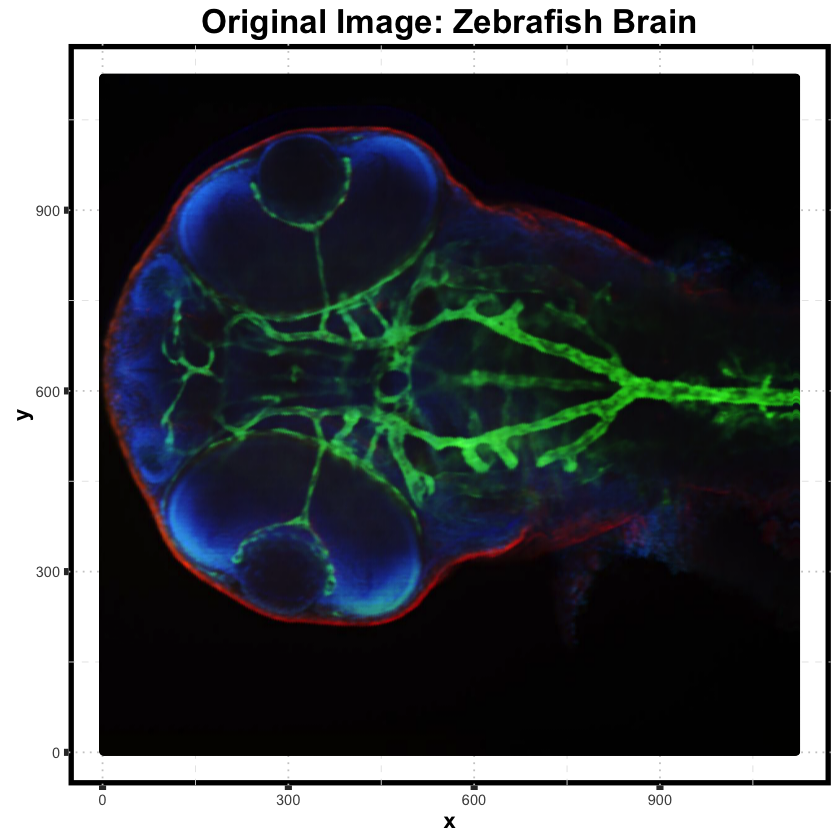

In [27]:
# Plot the image - this is a re-rendering of original by the way
ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(color = rgb(imgRGB[c("R", "G", "B")])) +
  labs(title = "Original Image: Zebrafish Brain") +
  xlab("x") +
  ylab("y") +
  plotTheme()

### Cluster it

In [14]:
kClusters <- 4
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters)
kColors <- rgb(kMeans$centers[kMeans$cluster,])

In [15]:
head(kMeans$centers)

,R,G,B
1,0.1542233,0.5705637,0.2478567
2,0.1544659,0.2991689,0.5766785
3,0.1286115,0.1478875,0.2035499
4,0.02084664,0.01701807,0.02323046


In [16]:
head(kMeans$cluster)

[1] 4 4 4 4 4 4

### Plot cluster results

EXERCISE
* Fill in the blanks in this plot using ggplot to visualize the results of k-Means clustering.

```R
ggplot(data = ___, aes(x = x, y = y)) + 
  geom_point(color = ___) +
  labs(title = paste("k-Means Clustering of", ___, "Colors")) +
  xlab("x") +
  ylab("y") + 
  plotTheme()
```

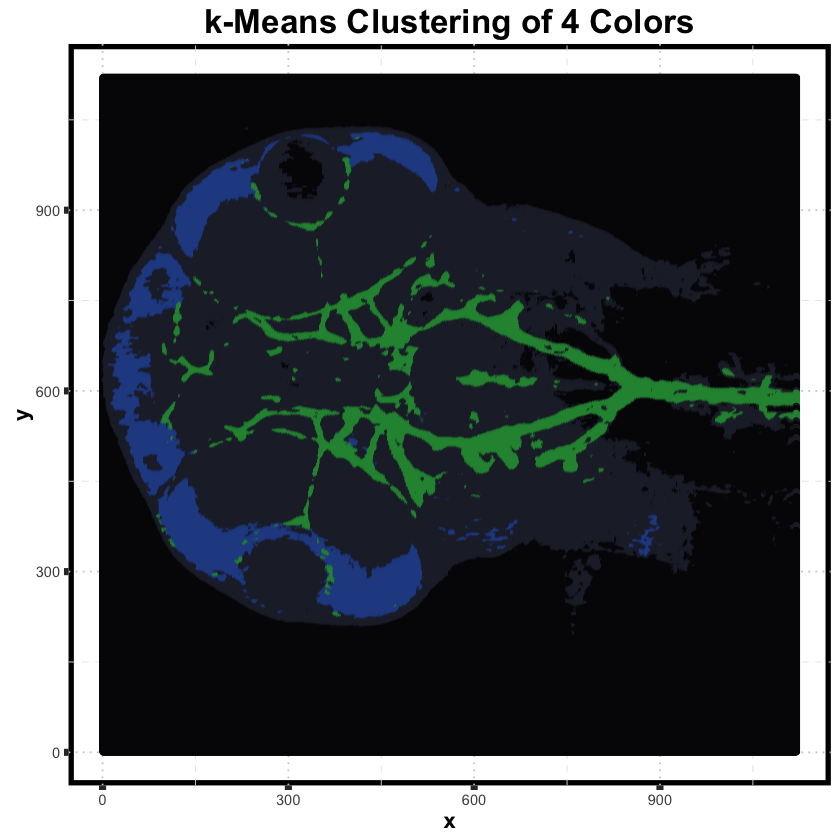

In [17]:
ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(color = kColors) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colors")) +
  xlab("x") +
  ylab("y") + 
  plotTheme()

QUESTION:  How would you quantify each "channel" or signal associated with a cluster?

## Resources

### Popular image processing packages
 
1. imager 
2. EBImage from bioc 
3. ripa 
4. adimpro


### Recent image processing in R blogs
 
https://www.linkedin.com/pulse/image-processing-r-part-1-anuj-kumar  
 
http://www.r-bloggers.com/new-package-for-image-processing-in-r/  
 
http://blog.kaggle.com/2015/12/04/image-processing-machine-learning-in-r-denoising-dirty-documents-tutorial-series/

### Machine and stats learning packages (CRAN Task View)

https://cran.r-project.org/web/views/MachineLearning.html
